In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tifffile
from tqdm.notebook import tqdm, trange
from preprocessing import preprocessing_v2 as pp
import ants # for registration of bio imaging images
from utils import analysis_utils as au
from utils import graph_utils as gu

## <span color=red >Important Notes </span>
Remove frame 39 c1,c2

## PATHS and CONSTANTS



In [5]:

PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
#DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
DATA_PATH = r'D:\amityu\backoffice_data\\'


movie ='280523 AM100 568_2'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/", movie + "/")
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [3]:
# save experiment data to a json file, the movie path, name, and resoultion x,y,z , spike in and spike out are the entrance and exit times of the collapsing area
execute = False
if execute:
    pp.save_exp_data(MOVIE_PATH, "AM100 568_2", 0.175,0.175, 0.250, spike_in=-1, spike_out=-1)


## <span color=red >Load Images

</span>


In [12]:
# get channel 1 file name list
file_list = pp.get_file_list(MOVIE_PATH + 'tiff/C1/')
file_list



40 T40_C1.tif
41 T41_C1.tif
42 T42_C1.tif
43 T43_C1.tif
44 T44_C1.tif
45 T45_C1.tif
46 T46_C1.tif
47 T47_C1.tif
48 T48_C1.tif
49 T49_C1.tif
50 T50_C1.tif
51 T51_C1.tif
52 T52_C1.tif
53 T53_C1.tif
54 T54_C1.tif
55 T55_C1.tif
56 T56_C1.tif
57 T57_C1.tif
58 T58_C1.tif
59 T59_C1.tif
60 T60_C1.tif
61 T61_C1.tif
62 T62_C1.tif
63 T63_C1.tif
64 T64_C1.tif
65 T65_C1.tif
66 T66_C1.tif
67 T67_C1.tif
68 T68_C1.tif
69 T69_C1.tif
70 T70_C1.tif
71 T71_C1.tif
72 T72_C1.tif
73 T73_C1.tif


['T40_C1.tif',
 'T41_C1.tif',
 'T42_C1.tif',
 'T43_C1.tif',
 'T44_C1.tif',
 'T45_C1.tif',
 'T46_C1.tif',
 'T47_C1.tif',
 'T48_C1.tif',
 'T49_C1.tif',
 'T50_C1.tif',
 'T51_C1.tif',
 'T52_C1.tif',
 'T53_C1.tif',
 'T54_C1.tif',
 'T55_C1.tif',
 'T56_C1.tif',
 'T57_C1.tif',
 'T58_C1.tif',
 'T59_C1.tif',
 'T60_C1.tif',
 'T61_C1.tif',
 'T62_C1.tif',
 'T63_C1.tif',
 'T64_C1.tif',
 'T65_C1.tif',
 'T66_C1.tif',
 'T67_C1.tif',
 'T68_C1.tif',
 'T69_C1.tif',
 'T70_C1.tif',
 'T71_C1.tif',
 'T72_C1.tif',
 'T73_C1.tif']

In [13]:
#load images
gel_list = []
for i in range(len(file_list)):
    gel_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C1/' + file_list[i]))
    print(i, end=',')
# get the max z since images where taken with different
max_z = pp.get_max_z(gel_list)

#set blank areas to nan
# make a numpy out of the tif files
#gel = pp.make_numpy_from_list(gel_list, max_z)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,0 : (69, 512, 512)
1 : (69, 512, 512)
2 : (69, 512, 512)
3 : (69, 512, 512)
4 : (69, 512, 512)
5 : (69, 512, 512)
6 : (69, 512, 512)
7 : (69, 512, 512)
8 : (69, 512, 512)
9 : (69, 512, 512)
10 : (69, 512, 512)
11 : (69, 512, 512)
12 : (69, 512, 512)
13 : (69, 512, 512)
14 : (69, 512, 512)
15 : (69, 512, 512)
16 : (69, 512, 512)
17 : (69, 512, 512)
18 : (69, 512, 512)
19 : (69, 512, 512)
20 : (69, 512, 512)
21 : (69, 512, 512)
22 : (69, 512, 512)
23 : (69, 512, 512)
24 : (69, 512, 512)
25 : (69, 512, 512)
26 : (69, 512, 512)
27 : (69, 512, 512)
28 : (69, 512, 512)
29 : (69, 512, 512)
30 : (69, 512, 512)
31 : (69, 512, 512)
32 : (69, 512, 512)
33 : (69, 512, 512)
max_z_value 69


In [14]:
np.save(MOVIE_PATH + 'np/gel.npy',gel)

### caluculate transformation for stabilization


In [ ]:
    #import gaussian filter
#import preprocessing as pre
from scipy.ndimage import gaussian_filter
# loading file as memory map reads to memory only chunks of the file each time, (don't forget to delete the file to release it. (del gel)
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')

img = pp.stabilize(gel[:, :80, :, :], movie_path=MOVIE_PATH,
                    transform_path=PROJECT_PATH + 'add_data/%s/transform/' % movie,
                    mask_coordinates=(5, 28, 50, 512, 50, 512), moving_mask_coordinates=(5, 28, 50, 512, 50, 512),
                    transformation_type='DenseRigid')


In [15]:
# apply the saved calculated transformation to the gel to get stabilized gel
gel = np.load(MOVIE_PATH + 'np/gel.npy')
gel_transformed = np.zeros(gel.shape)

for t in trange(len(gel)):
    image = ants.from_numpy(np.transpose(gel[t], (2,1,0)))
    new_image = ants.apply_transforms(fixed=image, moving=image, transformlist=PROJECT_PATH + 'add_data/%s/transform/transform%d.mat'%(movie,t+1), defaultvalue =0)
    gel_transformed[t] = np.transpose(new_image.numpy(), (2,1,0))

  0%|          | 0/34 [00:00<?, ?it/s]

In [17]:
np.save(MOVIE_PATH + 'tmp/gel_transformed.npy', gel_transformed)

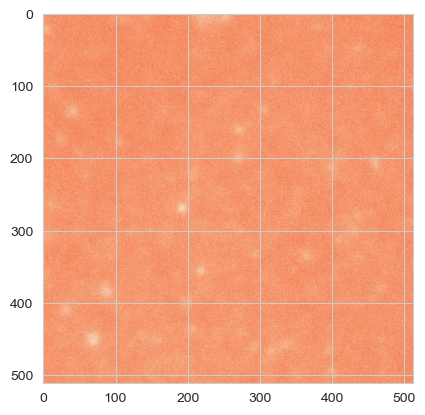

In [16]:
plt.imshow(gel_transformed[10,8,:,:])
plt.show()

In [18]:

# after translating the gel needs to replace added zeros with nans
gel_transformed[gel_transformed == 0] = np.nan

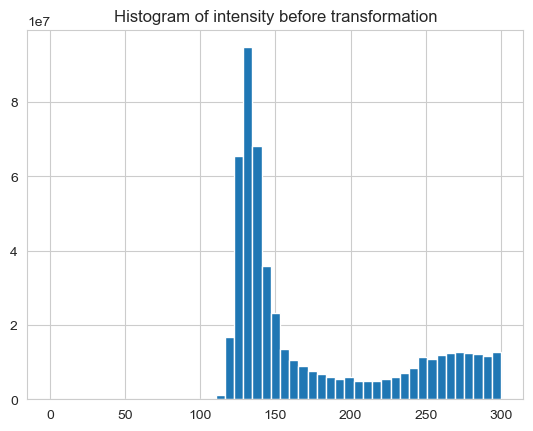

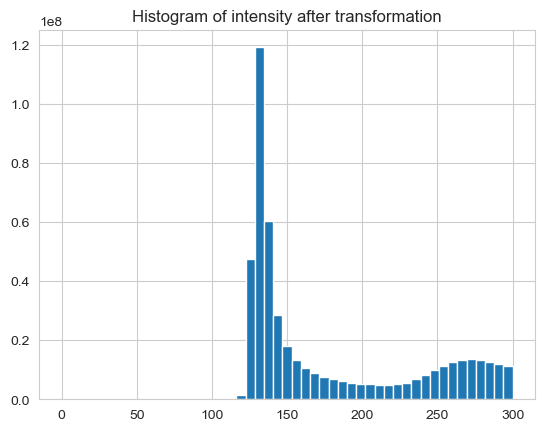

In [19]:
bins = np.linspace(0, 300, 50)
plt.hist(gel[~np.isnan(gel)], bins = bins)
plt.title('Histogram of intensity before transformation')
plt.show()

plt.hist(gel_transformed[~np.isnan(gel_transformed)], bins = bins)
plt.title('Histogram of intensity after transformation')

plt.show()


In [24]:
np.save(MOVIE_PATH + 'tmp/gel_transformed.npy',gel_transformed)

In [35]:
gel_transformed = np.load(MOVIE_PATH + 'tmp/gel_transformed.npy')

## <span color=red> Illumination filter

In [36]:
min_z_filter = 60   # usually the filter is taken beneath membrane but this time because of drift there was no place there so it was taken at the top of image
max_z_filter = 69
illumination_sigma = 25

In [37]:
gel_transformed[np.isnan(gel_transformed)] = np.nanmean(gel_transformed[25,min_z_filter:max_z_filter,:,:])

# in the next images see that the uneven illumination filter is more or less conssistent, otherwise you probably not allway on empty areas. Range of values in the colorbar should usually be small, again otherwise it means area is not "empty"

0it [00:00, ?it/s]

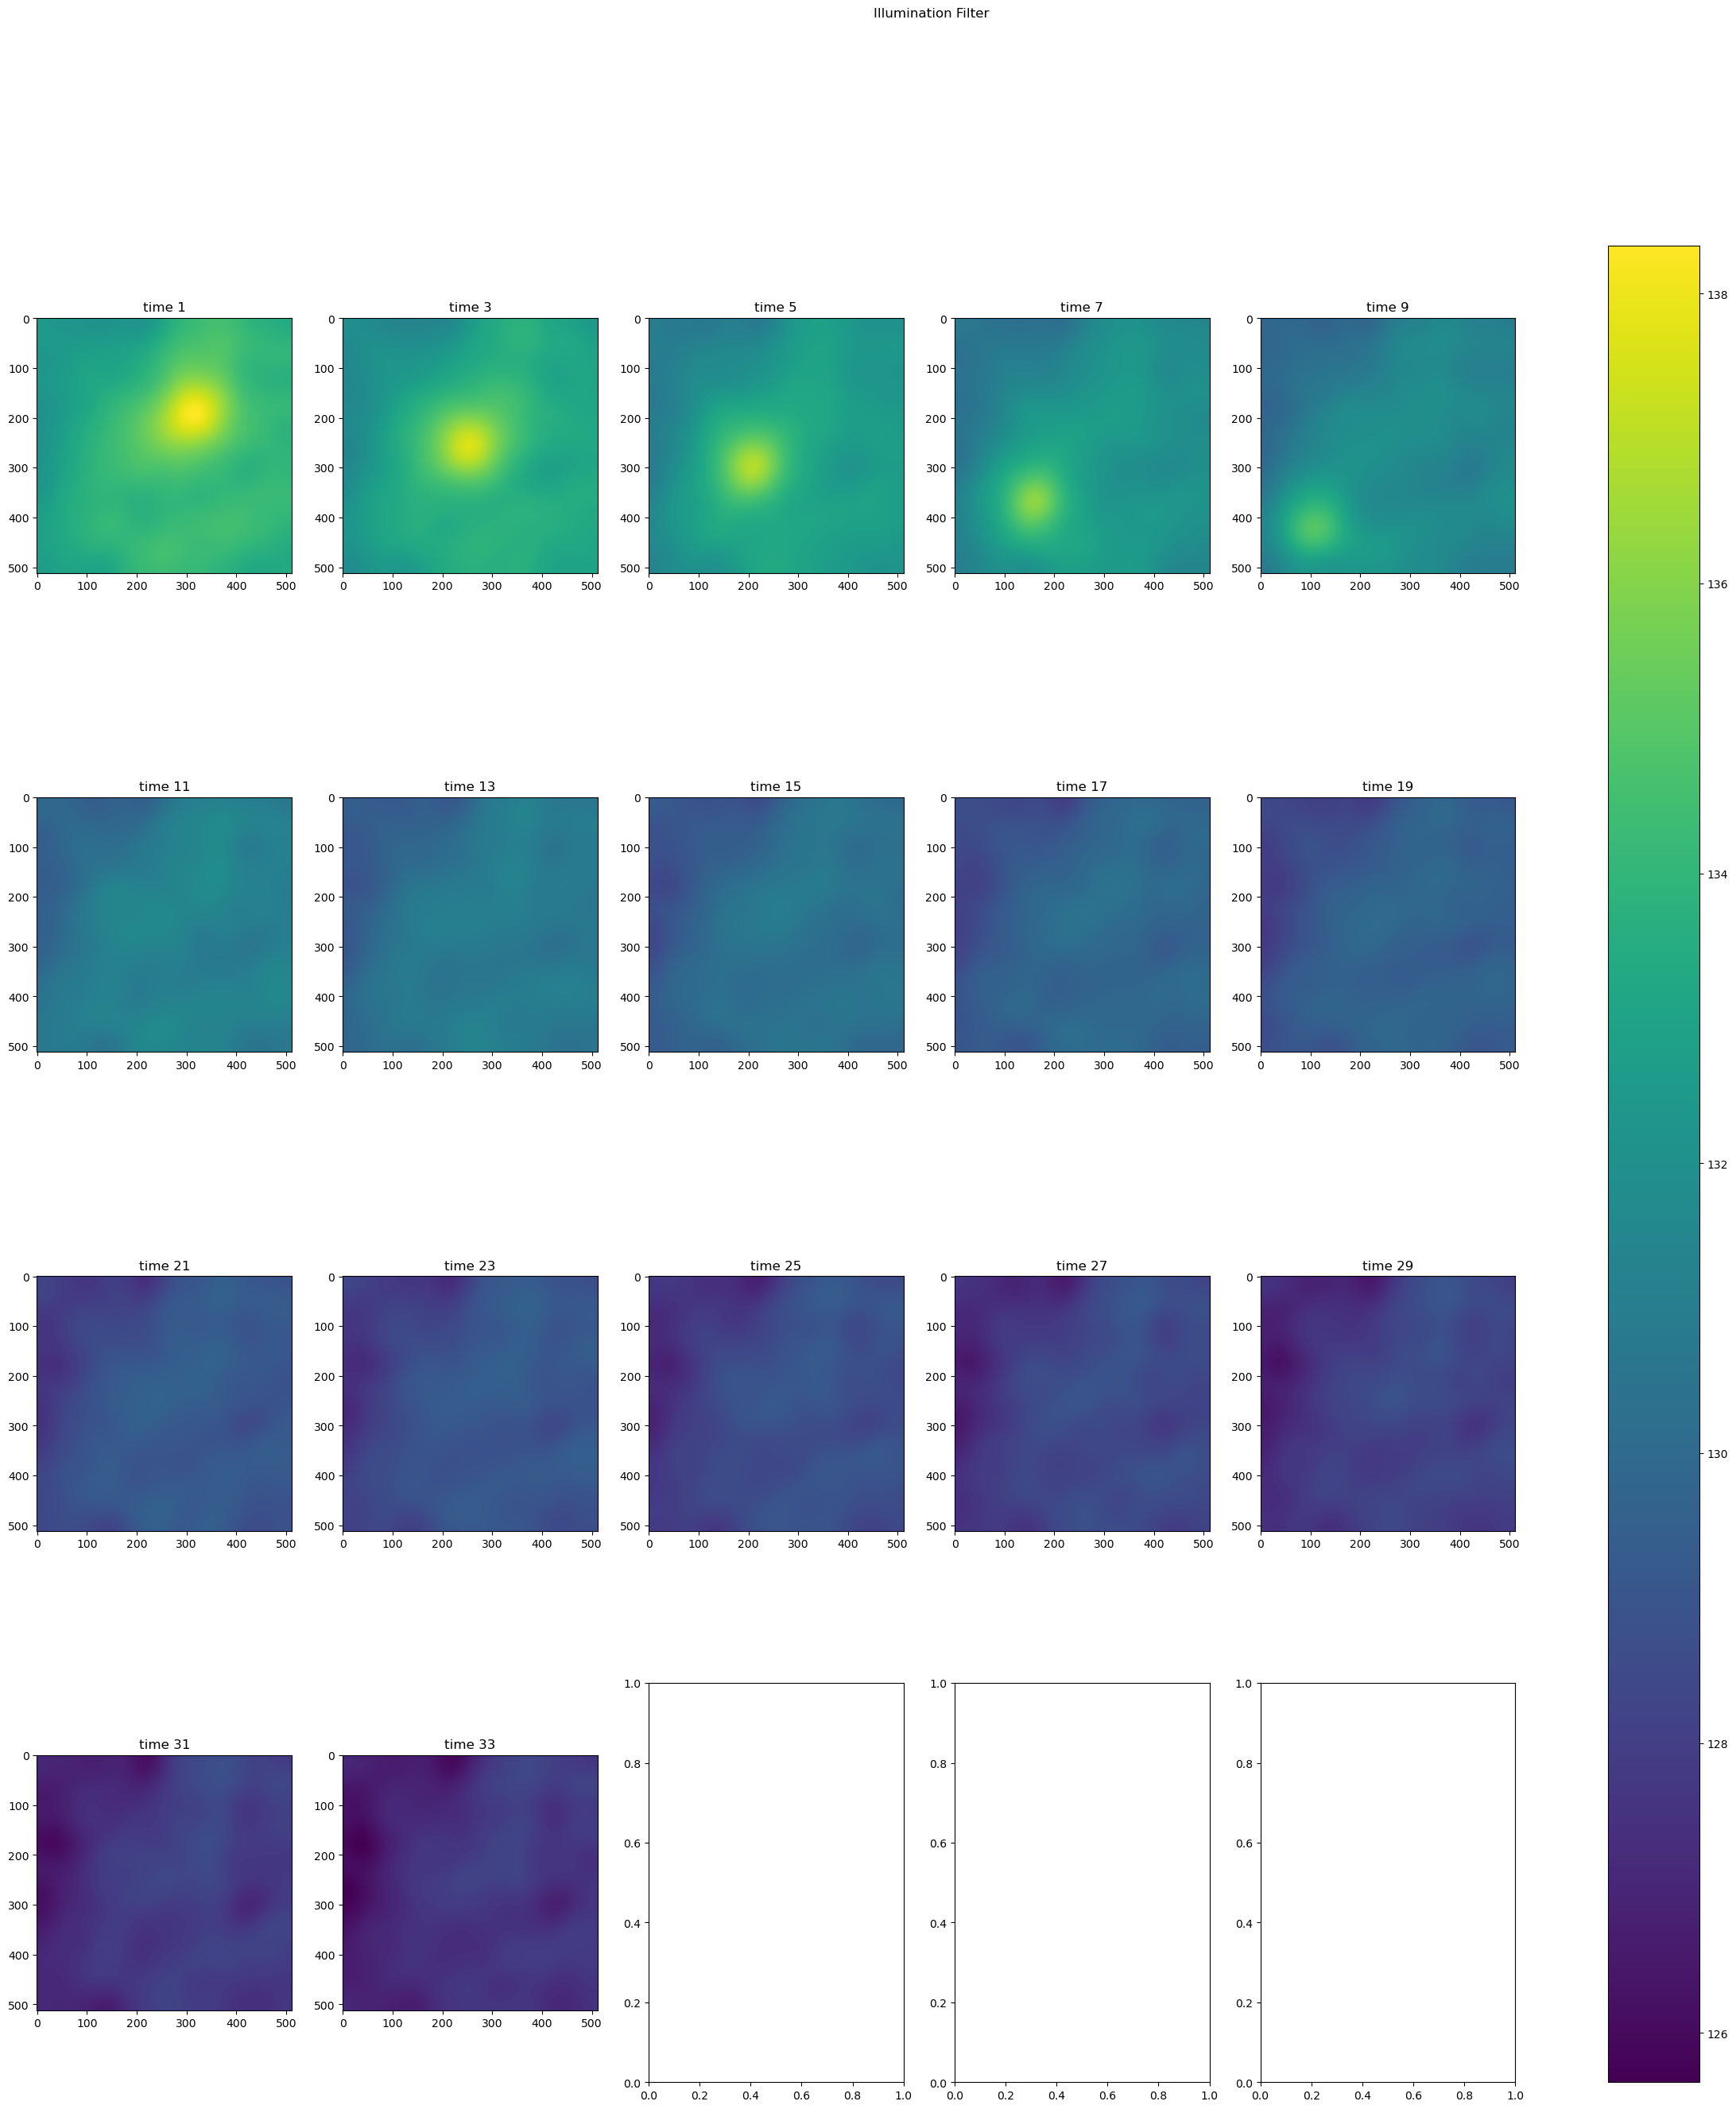

In [38]:
time_points = range(1, len(gel_transformed), 2)
filters = []
for i, t in tqdm(enumerate(time_points)):
    filters.append(pp.get_illumination_filter(gel_transformed[t], min_z_filter, max_z_filter, illumination_sigma))
gu.show_imshow_sequence_with_colorbar(filters, time_points, 'Illumination Filter')


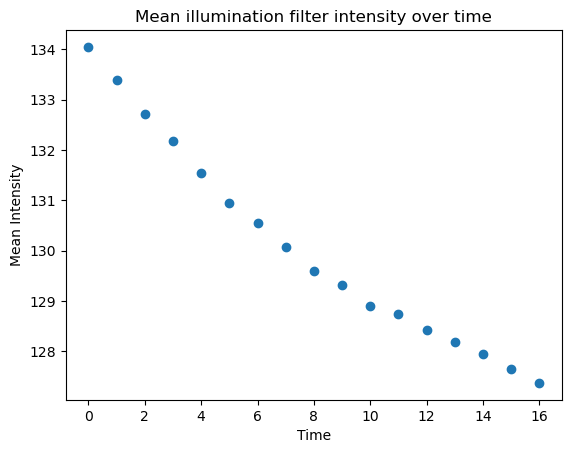

In [39]:
# next graph sould usually be declining exponential resembling the photobleaching affect. if it is not, it means eighter there is a wrong placement of filters, or 
# system might be to active, and photo bleaching affect is not significant, or not detectable
#now we see the mean of the filters it helps to see if there is a large shift in terms of addition or substraction to the image intensity. in the folowing graph with see the add/sub is in scale of 1e-05 which is low and no farther correction is required
mean_illumination = np.mean(filters, axis = (1,2))
plt.scatter(range(len(mean_illumination)), mean_illumination)
plt.title('Mean illumination filter intensity over time')
plt.xlabel('Time')
plt.ylabel('Mean Intensity')
plt.show()


In [41]:


gel_corrected = pp.apply_illumination_filter(gel_transformed, min_z_filter, max_z_filter, illumination_sigma)


  0%|          | 0/34 [00:00<?, ?it/s]

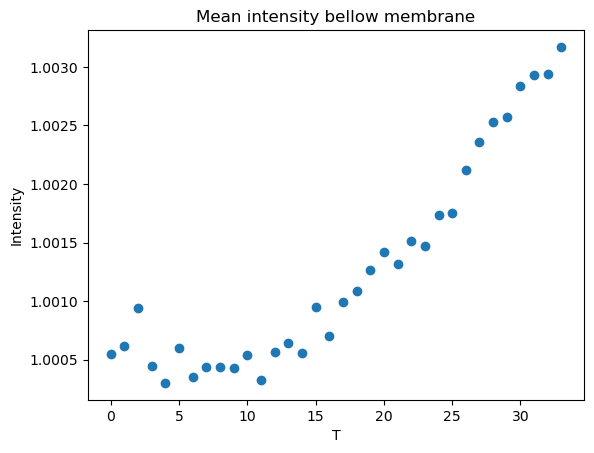

In [44]:
#in the next two figures we see that the offset of the mean of intensity at the upper part of the image, is not significant to the histogram of the values. so we assume the photo bleaching correction is successful
test_min_z = 60
test_max_z = 65
plt.scatter(range(0,len(gel_corrected)), np.nanmean(gel_corrected[:,test_min_z:test_max_z,:,:], axis=(1,2,3)))
plt.title('Mean at upper view')
plt.xlabel('T')
plt.ylabel('Intensity')
plt.show()

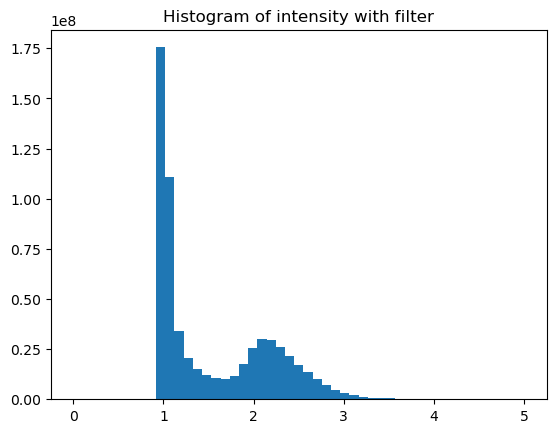

In [45]:
bins = np.linspace(0, 5, 50)
plt.hist(gel_corrected[~np.isnan(gel_corrected)], bins = bins)
plt.title('Histogram of intensity with filter')
plt.show()


In [ ]:
# no shifting of intensity because there is not a place where I can look for background during all time

In [46]:
np.save(MOVIE_PATH + 'tmp/gel_corrected.npy',gel_corrected)

In [5]:
#  debug only
#  gel_corrected = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [29]:
gel_corrected = np.load(MOVIE_PATH + 'tmp/gel_corrected.npy')

In [7]:
from scipy.optimize import curve_fit

# Define the Gaussian function
def fit_gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


In [8]:
def plot_data(data, bins, bins_number=50):
    # bins = np.linspace(min_intensity, max_intensity, bins_number+1)   # Define the bins
    hist, _ = np.histogram(data[~np.isnan(data)], bins=bins, density=True)
    mean = np.nanmean(data)
    std = np.nanstd(data)

    # Calculate the bin widths
    bin_widths = bins[1:] - bins[:-1]
    bin_gap_mid = (bins[1] - bins[0])/ 2
    # Calculate the density function
    density = hist / np.sum(hist * bin_widths)
    #original_array = density

    x_data = np.linspace(bins[0] + bin_gap_mid , bins[-1] - bin_gap_mid, len(density))
    y_data = density

    # Fit the Gaussian function to the data
    initial_guess = [mean, std, 1]  # Initial guess for the parameters: [mu, sigma, amplitude]
    optimized_params, _ = curve_fit(fit_gaussian, x_data, y_data, p0=initial_guess)

    # Extract the optimized parameter values
    mu_opt, sigma_opt, amplitude_opt = optimized_params

    # Generate the fitted curve using the optimized parameters
    y_fitted = fit_gaussian(x_data, mu_opt, sigma_opt, amplitude_opt)
    new_indices = np.linspace(0, len(y_fitted) - 1, 50 * len(y_fitted))

    # Perform interpolation
    interpolated_y   = np.interp(new_indices, range(len(y_fitted)), y_fitted)
    interpolated_x   = np.interp(new_indices, range(len(y_fitted)), x_data)
    smoothed_y = gaussian_filter(interpolated_y, sigma=15)
    return interpolated_x, smoothed_y, density,  mu_opt, sigma_opt, amplitude_opt

### geting monomoer signal,
## finding monomer area
## Line scan of monomer area animation

In [13]:
from IPython.display import HTML
plt.rcParams['animation.html'] = 'jshtml'
import matplotlib.animation as animation

mip_width = 500
frame_shape = gel[0,:,:,0].shape
max_intensity = np.nanmax(gel)
num_frames = len(gel)

#for j in range(0,gel.shape[3],mip_width):
for j in [250]:
    # Create a figure and axis
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_position([0.1, 0.1, 0.8, 0.8])  # Sets the size of the axes within the figure

    # Create an empty plot
    plot, = ax.plot(np.zeros(10))
    ax.set_ylim(0,max_intensity)

    # Update function for each frame
    def update_frame(t):

        ax.clear()
        for i in range(0,500,500):
        #for i in range(0,gel.shape[2],mip_width):

            line = np.max(gel[t,:,i:i+mip_width,j], axis=1) #get line of intensity
            #replace nun with zero in image
            line[np.isnan(line)] = 0
            ax.plot(line, label = 'i = %d - %d'%(i, i+mip_width))
            ax.set_ylim (0,max_intensity)
            plt.xlabel('Z')
            plt.ylabel('Intensity')

        ax.set_title('movie %s Frame: %d j=%d, mip_width=%d' % (movie,t,j,mip_width))
        ax.legend()
        return plot,

    # Create the animation
    myanimation = animation.FuncAnimation(fig, update_frame, range(num_frames), interval=1000, blit=True)
    writer = animation.FFMpegWriter(fps=1)

    myanimation.save(GRAPH_PATH + 'preprocessing/' + movie + 'linescan_j=%d_mip_width=%d.mp4'%(j,mip_width), writer=writer)

# Display the animation
#plt.show()
#HTML(myanimation.to_jshtml())
plt.close()

## <span color = red>RAW MIP  animation

## <span color = red>Gel monomer free area animation <span>


In [3]:
gel = np.load(MOVIE_PATH + 'tmp/gel_corrected.npy')

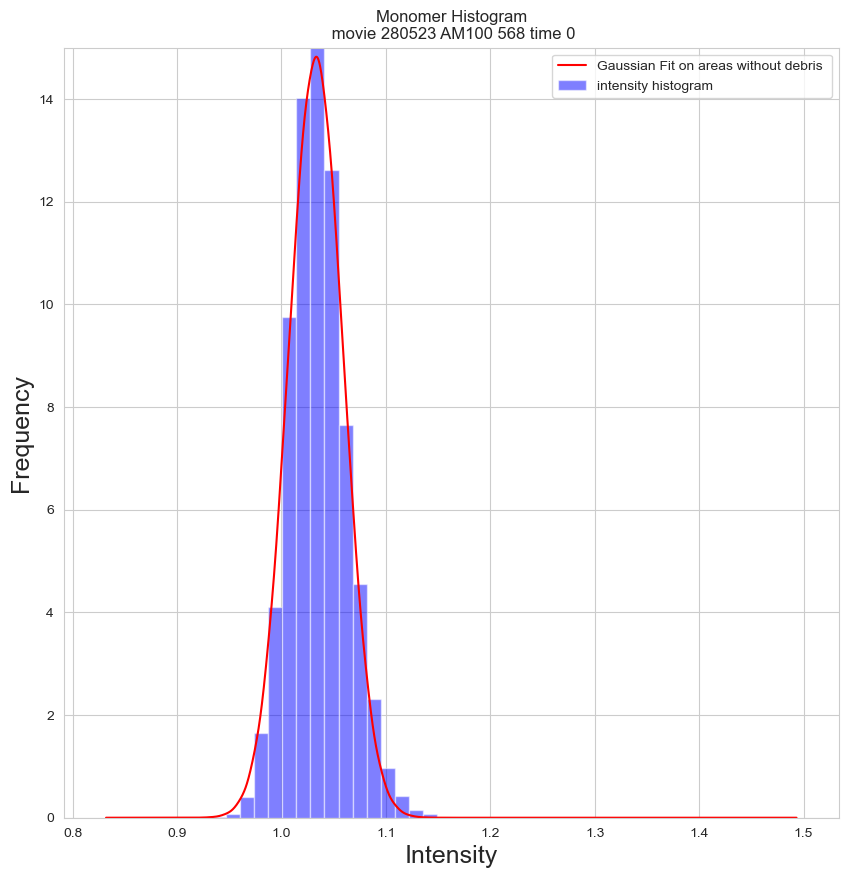

In [9]:
illumination_fix = True
monomer_data_df = pd.read_csv(ADD_PATH + 'monomer_rect.csv')
sigma = 25
z = 0
delta_z = 5
bin_number = 50
frame_shape = gel[0,:,:,0].shape
num_frames = len(gel)
y_max = 15
#gel_corrected = np.zeros(gel.shape)
#gel_corrected[np.isnan(gel_corrected)] = 0
#for t in range(len(gel)):
#    gel_corrected[t] = gel[t] / illumination_filter
#gel_corrected[gel_corrected < 0.5] = np.nan
max_intensity = np.nanmax(gel)
max_intensity =1.5
min_intensity = np.nanmin(gel)


bin_number = 50
bins = np.linspace(min_intensity, max_intensity, bin_number + 1)
I_mean_list = []
I_std_list = []

# Update function for each frame
def update_frame(t):
    ax.clear()

    iz = monomer_data_df.at[t, 'Z']
    iy =monomer_data_df.at[t, 'Y']
    ix = monomer_data_df.at[t, 'X']
    r_size = monomer_data_df.at[t, 'r_size']
    gap_from_surface =monomer_data_df.at[t, 'gap_from_surface']
    y_gap = monomer_data_df.at[t, 'y_gap']
    data_corrected = gel[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, ix:ix+r_size]
    #data_not_corrected = gel_corrected[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, :]

    data_corrected = data_corrected[~np.isnan(data_corrected)]
    if data_corrected.size == 0:
        return plot,
    #data_not_corrected = data_not_corrected[~np.isnan(data_not_corrected)]
    #if data_not_corrected.size == 0:
    #    return plot,

    # Create an array for the interpolated values
    try:
        interpolated_x, smoothed_y, density, mean, std, amp = plot_data(data_corrected, bins=bins)

        I_mean_list.append(mean)
        I_std_list.append(std)
        ax.set_xlabel('Intensity', fontsize = 18)
        ax.set_ylabel('Frequency', fontsize = 18)
        ax.set_ylim(0, y_max)
        #ax.set_title('Monomer Histogram\n movie %s time %d \n z=%d-%d, x=%d-%d all y \n ' % (movie, t, row['z_start'], row['z_start'] + row['z_gap'], row['j_start'], row['j_start'] + row['j_gap']))
        ax.set_title('Monomer Histogram\n movie %s time %d' % (movie, t ))

        #interpolated_x, smoothed_y, density, mean, std, amp = plot_data(data_not_corrected, bins=bins)
        #ax.plot(interpolated_x, smoothed_y, color='b', label='Gaussian Fit on all values including debris ')
        ax.plot(interpolated_x, smoothed_y, color='r', label='Gaussian Fit on areas without debris ')
    except:
        print(t, 'error')
        return plot,
    #density[np.isnan(density)] = 0
    ax.bar(bins[:-1], density, width=np.diff(bins), align='edge', label='intensity histogram', alpha=0.5, color='b')
    ax.legend()
    return plot,


# Create a figure and axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
#ax.set_position([0.1, 0.1, 0.8, 0.8])  # Sets the size of the axes within the figure

# Create an empty plot
plot = ax.bar(bins, np.ones(len(bins)))


# Create the animation
myanimation = animation.FuncAnimation(fig, update_frame, range(num_frames), interval=1000)
writer = animation.FFMpegWriter(fps=1)

myanimation.save(GRAPH_PATH + 'detecting_monomer\%s_monomer_hist_red_clean.mp4' % movie, writer=writer)

# Display the animation
HTML(myanimation.to_jshtml())
#plt.close()

In [11]:
I_mean_list = []
I_std_list = []
z = 0
delta_z = 5
sigma = 25


max_intensity =1.5
min_intensity = np.nanmin(gel)


bin_number = 50
bins = np.linspace(min_intensity, max_intensity, bin_number + 1)


for t in trange(len(gel)):

    iz = monomer_data_df.at[t, 'Z']
    iy =monomer_data_df.at[t, 'Y']
    ix = monomer_data_df.at[t, 'X']
    r_size = monomer_data_df.at[t, 'r_size']
    gap_from_surface =monomer_data_df.at[t, 'gap_from_surface']
    y_gap = monomer_data_df.at[t, 'y_gap']
    data_corrected = gel[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, ix:ix+r_size]

    data_corrected = data_corrected[~np.isnan(data_corrected)]
    if data_corrected.size == 0:
        I_mean_list.append(np.nan)
        I_std_list.append(np.nan)
        continue
    interpolated_x, smoothed_y, density, mean, std, amp = plot_data(data_corrected, bins=bins)
    I_mean_list.append(mean)
    I_std_list.append(std)



monomer_data_df['gaussian_mean'] = I_mean_list
monomer_data_df['gaussian_std'] = I_std_list
monomer_data_df.to_csv(MOVIE_PATH + 'np/monomer_rect.csv')

  0%|          | 0/39 [00:00<?, ?it/s]

### <span color = red> copy dataframe to add data folder


In [35]:
monomer_data_df = pd.read_csv(ADD_PATH + 'monomer_rect.csv')

In [36]:
gel_corrected = np.load(MOVIE_PATH + 'tmp/gel_corrected.npy')

In [37]:
monomer_mean = monomer_data_df['gaussian_mean'].values
for t in range(len(gel_corrected)):
    gel_corrected[t] -= monomer_mean[t] 

In [38]:
raw_data = gel_corrected[~np.isnan(gel_corrected)]  

In [39]:
#
hist, bin_edges = au.histogram_cupy(raw_data, bins=np.linspace(-0.3, 2, 50))

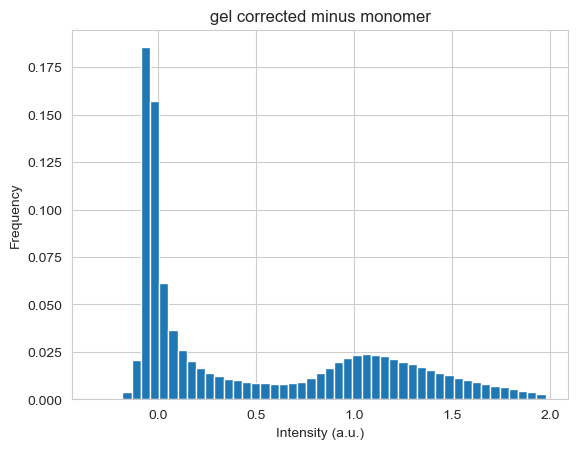

In [40]:

plt.bar(bin_edges[:-1], hist, width=bin_edges[1] - bin_edges[0])
plt.title('gel corrected minus monomer')
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')
plt.show()

In [41]:
del raw_data

In [42]:
np.save(MOVIE_PATH + 'tmp/gel_norm_b.npy', gel_corrected)

In [43]:
del gel_corrected

In [44]:
gel_norm = np.load(MOVIE_PATH + 'tmp/gel_norm_b.npy')

In [45]:

from preprocessing import preprocessing_v2 as pp
for std in [4.5]:
    surface, membrane = pp.get_surface_and_membrane(gel_norm, ADD_PATH, number_of_mean=0, number_of_std= std, selem_radius=3)
    surface[surface>=gel.shape[1]]= gel.shape[1]-1
    np.save(MOVIE_PATH + 'tmp/height%d_s3.npy'%(std*10), surface)
    np.save(MOVIE_PATH + 'tmp/membrane%d_s3.npy'%(std*10),membrane)

  0%|          | 0/34 [00:00<?, ?it/s]

### <span color = red> drop first frame from gel and motors_norm height, and membrane


In [ ]:
%%sql


In [48]:
del gel_norm

## <span color=red > Load Channel 2 images

In [49]:
file_list = pp.get_file_list(MOVIE_PATH + 'tiff/C2/')
#load images
c2_list = []
for i in range(len(file_list)):
    c2_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C2/' + file_list[i]))

    print(i, end=',')
# get the max z since images where taken with different
max_z = pp.get_max_z(c2_list)

#set blank areas to nan

c2 = pp.make_numpy_from_list(c2_list, max_z)


40 T40_C2.tif
41 T41_C2.tif
42 T42_C2.tif
43 T43_C2.tif
44 T44_C2.tif
45 T45_C2.tif
46 T46_C2.tif
47 T47_C2.tif
48 T48_C2.tif
49 T49_C2.tif
50 T50_C2.tif
51 T51_C2.tif
52 T52_C2.tif
53 T53_C2.tif
54 T54_C2.tif
55 T55_C2.tif
56 T56_C2.tif
57 T57_C2.tif
58 T58_C2.tif
59 T59_C2.tif
60 T60_C2.tif
61 T61_C2.tif
62 T62_C2.tif
63 T63_C2.tif
64 T64_C2.tif
65 T65_C2.tif
66 T66_C2.tif
67 T67_C2.tif
68 T68_C2.tif
69 T69_C2.tif
70 T70_C2.tif
71 T71_C2.tif
72 T72_C2.tif
73 T73_C2.tif
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,0 : (69, 512, 512)
1 : (69, 512, 512)
2 : (69, 512, 512)
3 : (69, 512, 512)
4 : (69, 512, 512)
5 : (69, 512, 512)
6 : (69, 512, 512)
7 : (69, 512, 512)
8 : (69, 512, 512)
9 : (69, 512, 512)
10 : (69, 512, 512)
11 : (69, 512, 512)
12 : (69, 512, 512)
13 : (69, 512, 512)
14 : (69, 512, 512)
15 : (69, 512, 512)
16 : (69, 512, 512)
17 : (69, 512, 512)
18 : (69, 512, 512)
19 : (69, 512, 512)
20 : (69, 512, 512)
21 : (69, 512, 512)
22

In [52]:
np.save(MOVIE_PATH + 'tmp/motors.npy',c2)

In [53]:
motors = np.load(MOVIE_PATH + 'tmp/motors.npy')
motors_transformed = np.zeros(motors.shape)
import ants
for t in range(len(motors)):
    image = ants.from_numpy(np.transpose(motors[t], (2,1,0)))
    new_image = ants.apply_transforms(fixed=image, moving=image, transformlist=PROJECT_PATH + 'add_data/%s/transform/transform%d.mat'%(movie,t+1), defaultvalue =0)
    motors_transformed[t] = np.transpose(new_image.numpy(), (2,1,0))

In [54]:
motors_transformed[motors_transformed==0] = np.nan

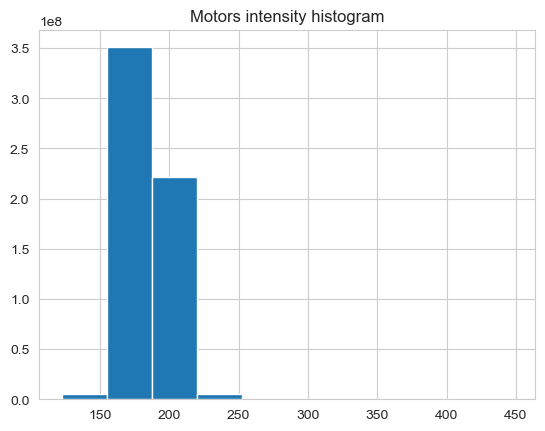

In [55]:
plt.hist(motors_transformed[~np.isnan(motors_transformed)])
plt.title('Motors intensity histogram')
plt.show()


In [56]:
np.save(MOVIE_PATH + 'tmp/motors_transformed.npy',motors_transformed)

In [61]:
motors_transformed = np.load(MOVIE_PATH + 'tmp/motors_transformed.npy')
motors_transformed= np.where(motors_transformed == 0, np.nan, motors_transformed)
motors_corrected = np.zeros(motors_transformed.shape)
filter_sigma = 25
slice = motors_transformed[25,60:69,:,:]
print('illumination mean', np.nanmean(slice))
slice[np.isnan(slice)] = np.nanmean(slice)
illumination_filter = np.nanmean(gaussian_filter(slice,sigma=25),axis = 0)

for t in range(len(motors_transformed)):
    motors_corrected[t] = motors_transformed[t]/illumination_filter


illumination mean 183.01775004074878


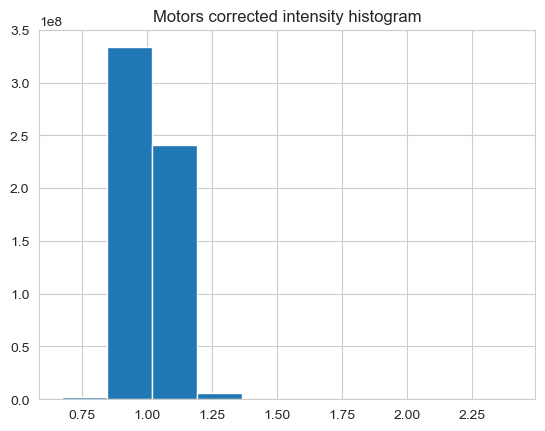

In [62]:
plt.hist(motors_corrected[~np.isnan(motors_corrected)])
plt.title('Motors corrected intensity histogram')
plt.show()

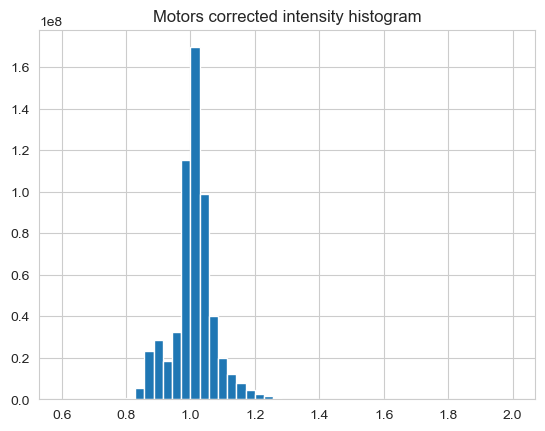

In [64]:
plt.hist(motors_corrected[~np.isnan(motors_corrected)],bins= np.linspace(0.6,2,50) )# correct same way as part 1
plt.title('Motors corrected intensity histogram')
plt.show()


In [65]:
motors_corrected -= 0.655

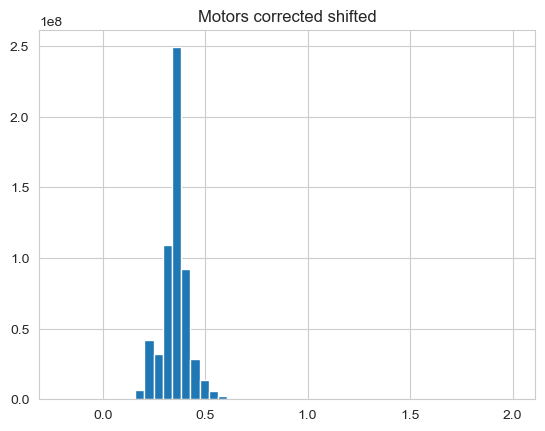

In [66]:
plt.hist(motors_corrected[~np.isnan(motors_corrected)],bins= np.linspace(-0.2,2,50) )
plt.title('Motors corrected shifted')
plt.show()


In [67]:
np.save(MOVIE_PATH + 'tmp/motors_norm_b.npy',motors_corrected)

In [68]:
del motors_corrected


In [71]:
motors = np.load(MOVIE_PATH + 'tmp/motors_norm_b.npy')
np.save(MOVIE_PATH + 'np/motors_norm.npy',motors)
gel = np.load(MOVIE_PATH + 'tmp/gel_norm_b.npy')

np.save(MOVIE_PATH + 'np/gel_norm.npy',gel)

In [69]:

surface = np.load(MOVIE_PATH + 'tmp/height45_s3.npy')
np.save(MOVIE_PATH + 'np/height.npy',surface)

membrane = np.load(MOVIE_PATH + 'tmp/membrane45_s3.npy')
np.save(MOVIE_PATH + 'np/membrane.npy',membrane)
# 